Text(0.5, 1.0, 'Varying Latidue (cart)')

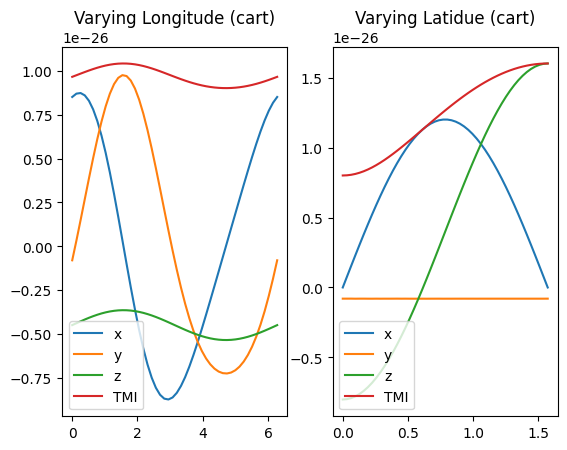

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import magnets as m

northpos = np.array([0, 1, 10])
southpos = np.array([0, -1, -10])

plotlimlat = np.pi/2
plotlimlong = 2*np.pi
lats = np.linspace(0, plotlimlat)
longs = np.linspace(0, plotlimlong)
cart = np.zeros((len(lats), 3))
sph = np.zeros((len(lats), 2))
TMI = np.zeros((len(lats)))

fix, (ax1, ax2) = plt.subplots(1, 2)

# Plotting against Longitudes
for i in range(len(lats)):
    point = np.array([m.EARTH_RAD, np.pi/8, longs[i]])
    cart[i] = m.magnetic_field_cart(northpos, southpos, point)
    sph[i] = m.magnetic_field_sph(northpos, southpos, point)
    TMI[i] = m.TMI(cart[i])


ax1.plot(longs, cart[:, 0], label="x")
ax1.plot(longs, cart[:, 1], label="y")
ax1.plot(longs, cart[:, 2], label="z")
ax1.plot(longs, TMI, label="TMI")
ax1.legend(loc="lower left")
ax1.set_title("Varying Longitude (cart)")


# Plotting against Latitudes
for i in range(len(lats)):
    point = np.array([m.EARTH_RAD, lats[i], 0])
    cart[i] = m.magnetic_field_cart(northpos, southpos, point)
    sph[i] = m.magnetic_field_sph(northpos, southpos, point)
    TMI[i] = m.TMI(sph[i])


ax2.plot(lats, cart[:, 0], label="x")
ax2.plot(lats, cart[:, 1], label="y")
ax2.plot(lats, cart[:, 2], label="z")
ax2.plot(lats, TMI, label="TMI")
ax2.legend(loc="lower left")
ax2.set_title("Varying Latidue (cart)")


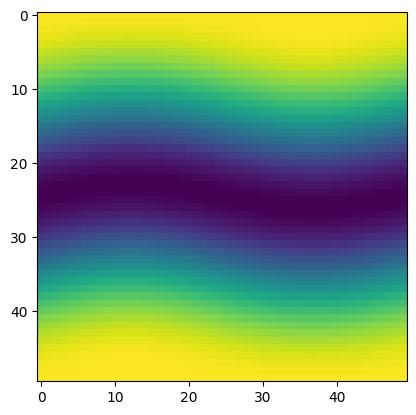

In [5]:
# Heatmap plot

import numpy as np
import matplotlib.pyplot as plt
import magnets as m

northpos = np.array([0, 1, 10])
southpos = np.array([0, -1, -10])

lats = np.linspace(-np.pi/2, np.pi/2)
longs = np.linspace(0, 2*np.pi)
cart = np.zeros((len(longs), len(lats), 3))
sph = np.zeros((len(longs), len(lats), 2))
TMI = np.zeros((len(longs), len(lats)))


for i in range(len(lats)):
    for j in range(len(longs)):
        point = np.array([m.EARTH_RAD, lats[i], longs[j]])
        cart[i, j] = m.magnetic_field_cart(northpos, southpos, point)
        TMI[i, j] = m.TMI(cart[i, j])


plt.imshow(TMI, interpolation='nearest')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magnets as m


northpos = np.array([0, 1, 10])
southpos = np.array([0, -1, -10])

lats = np.linspace(-np.pi/2, np.pi/2)
longs = np.linspace(0, 2*np.pi)
cart = np.zeros((len(longs), len(lats), 3))
sph = np.zeros((len(longs), len(lats), 2))
TMI = np.zeros((len(longs), len(lats)))


for i in range(len(lats)):
    for j in range(len(longs)):
        point = np.array([m.EARTH_RAD, lats[i], longs[j]])
        cart[i, j] = m.magnetic_field_cart(northpos, southpos, point)
        TMI[i, j] = m.TMI(cart[i, j])

 
cs = plt.contour(TMI, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()